In [1]:
#Importing Library packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression


In [2]:
#importing Dataset
df=pd.read_csv('C:\\Users\\welcome\\Downloads\\fish market dataset\\Fish.csv')

In [3]:
#Reading Dataset
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.shape

(159, 7)

In [5]:
#types of fish species in dataset
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<Figure size 2880x2880 with 0 Axes>

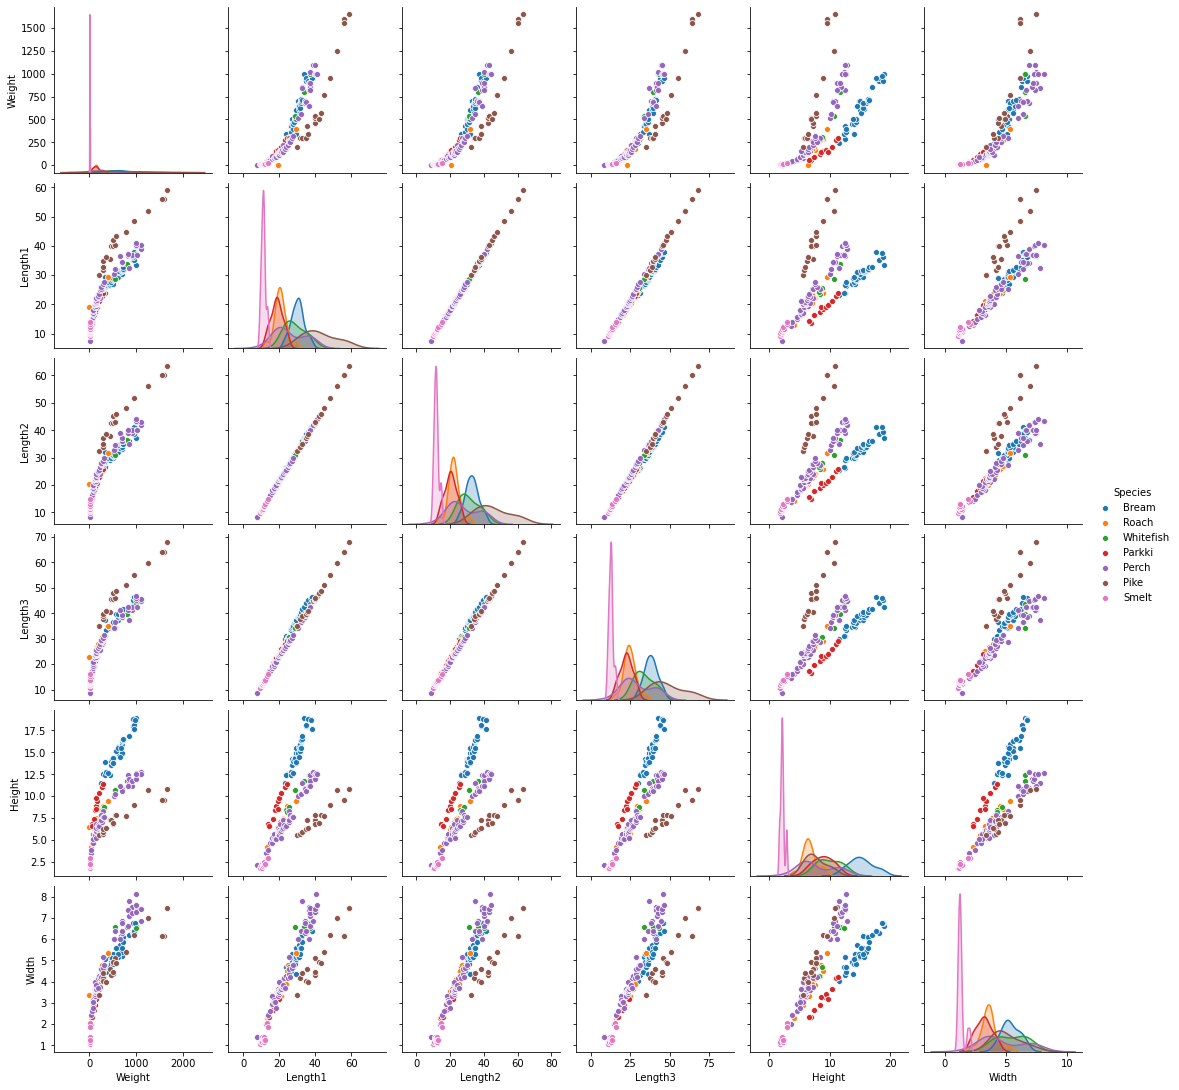

In [6]:
#Visualisation  of data in scatter plot
plt.figure(figsize=(40,40))
sns.pairplot(df,hue='Species',kind='scatter')

<Figure size 2880x2880 with 0 Axes>

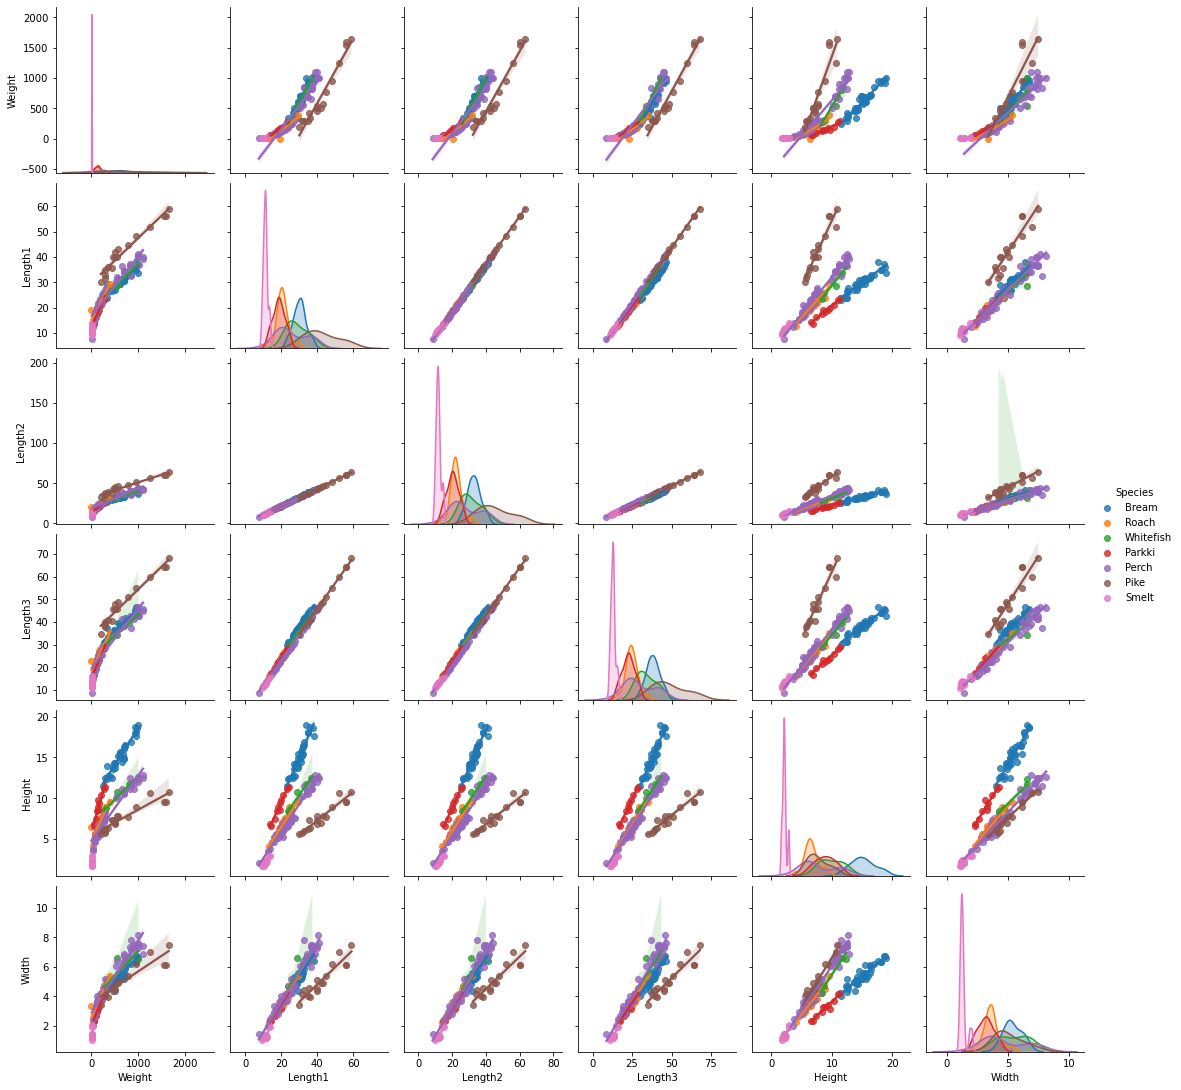

In [7]:
#Regression pairplots
plt.figure(figsize=(40,40))
sns.pairplot(df,hue='Species',kind='reg')

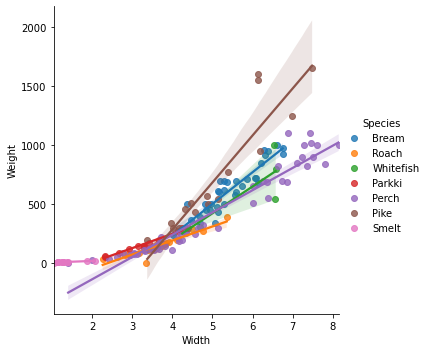

In [8]:
sns.lmplot(data=df,x='Width', y='Weight',hue='Species')

In [10]:
newdf=pd.get_dummies(data=df,columns=['Species'])

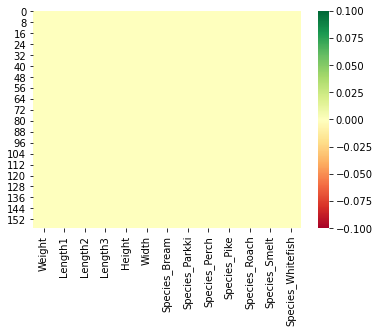

In [75]:
sns.heatmap(newdf.isnull(),cmap='RdYlGn')

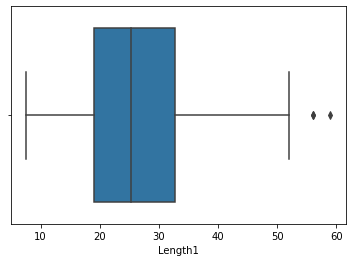

In [12]:
sns.boxplot(newdf['Length1'])

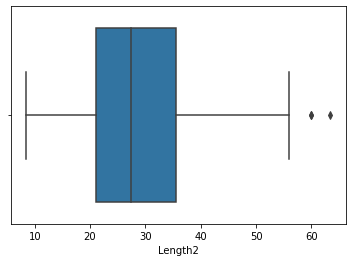

In [13]:
sns.boxplot(newdf['Length2'])

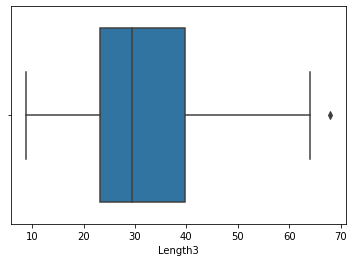

In [14]:
sns.boxplot(newdf['Length3'])

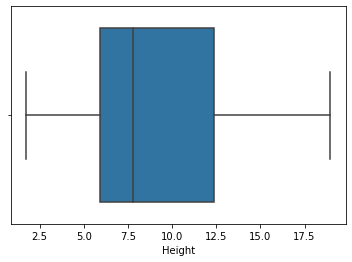

In [15]:
sns.boxplot(newdf['Height'])

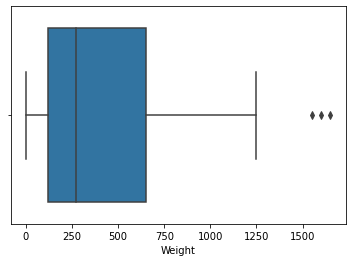

In [16]:
sns.boxplot(newdf['Weight'])

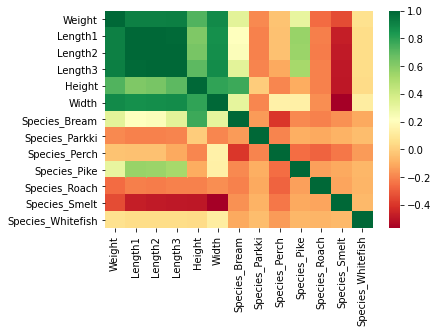

In [17]:
sns.heatmap(newdf.corr(),cmap='RdYlGn')

In [18]:
newdf

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [19]:
#Finding Multicollinearity using pearsons correlation
from scipy.stats import pearsonr
features=newdf.iloc[:,1:].columns.tolist()
target=newdf.iloc[:,0].name

In [20]:
for i in features:
    data=newdf[[i,target]]
    x1=data[i].values
    x2=data[target].values
    (x,y)= pearsonr(x1,x2)
    print(i,x,target,y)

Length1 0.9157117160312037 Weight 4.749619722769783e-64
Length2 0.9186177013642214 Weight 3.3951132290325303e-65
Length3 0.9230435593620119 Weight 5.023191454304738e-67
Height 0.7243453291993318 Weight 3.8423418389517936e-27
Width 0.8865066052433446 Weight 2.0381946411856538e-54
Species_Bream 0.3267948982262862 Weight 2.6196778263333158e-05
Species_Parkki -0.18603404619030106 Weight 0.01888340441999502
Species_Perch -0.033240477445154765 Weight 0.6774434448612534
Species_Pike 0.3106406316994373 Weight 6.743166388509178e-05
Species_Roach -0.2617843730379063 Weight 0.0008583654239079691
Species_Smelt -0.3371088536150251 Weight 1.3920122390299068e-05
Species_Whitefish 0.07362540067120073 Weight 0.35636775673021903


In [28]:
#Assigning indepedent and dependent variables
y=newdf['Weight']
x=newdf.drop('Weight',axis=1)

In [29]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaleddata=ss.fit_transform(x)

In [31]:
scaleddata=pd.DataFrame(scaleddata)
scaleddata.columns=['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

In [32]:
scaleddata

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,1.882248,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,1.882248,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,1.882248,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
3,0.005302,0.054694,0.196390,0.879771,0.022621,1.882248,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
4,0.025372,0.054694,0.239592,0.812835,0.426371,1.882248,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,-0.531280,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,-0.531280,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,-0.531280,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,-0.531280,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803


In [35]:
#Doing principal coponent analysis to remove multicollinearity
from sklearn.decomposition import PCA
pc=PCA(n_components=None)
pc.fit_transform(scaleddata)

array([[ 2.73435399e-01, -1.86454923e+00,  3.57985356e-01, ...,
        -1.60892299e-02,  2.39379161e-04, -6.47280976e-16],
       [ 5.37643549e-01, -1.93013001e+00,  3.25988007e-01, ...,
        -1.08258802e-03, -5.39158470e-03,  8.38628169e-16],
       [ 6.23978660e-01, -1.92576431e+00,  2.77464404e-01, ...,
        -2.80024932e-03,  1.93784253e-02, -5.41342699e-16],
       ...,
       [-4.11111371e+00,  1.46911188e-01,  1.34895575e+00, ...,
        -1.04190413e-02,  1.87111579e-02, -1.14818737e-16],
       [-3.71314065e+00,  1.23966841e-01,  1.26144912e+00, ...,
        -4.00039726e-03,  2.61061722e-02, -1.73066261e-16],
       [-3.66272978e+00,  1.52109959e-01,  1.30013597e+00, ...,
         1.88141211e-02,  1.96551575e-02, -6.19666792e-17]])

In [39]:

pc.explained_variance_ratio_

array([4.24732293e-01, 1.41244541e-01, 1.20103892e-01, 9.55541146e-02,
       9.08847756e-02, 8.78550898e-02, 3.57567578e-02, 2.84219375e-03,
       9.75949392e-04, 3.76514383e-05, 1.27416105e-05, 2.56035509e-33])

In [48]:
4.24732293e-01+1.41244541e-01+ 1.20103892e-01+ 9.55541146e-02 +9.08847756e-02+8.78550898e-02

0.960374706

In [41]:
pc.n_components_

12

In [51]:
pcs=PCA(n_components=6)
pcadata=pcs.fit_transform(scaleddata)

In [52]:
#Splitting the data to train and test 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pcadata,y,test_size=0.3)

In [56]:
#building linear regression model
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [86]:
import statsmodels.api as sm
linearmodel=sm.OLS(ytrain,xtrain)
results=linearmodel.fit()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.458
Model:                            OLS   Adj. R-squared (uncentered):              0.427
Method:                 Least Squares   F-statistic:                              14.78
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                    3.51e-12
Time:                        15:46:28   Log-Likelihood:                         -825.09
No. Observations:                 111   AIC:                                      1662.
Df Residuals:                     105   BIC:                                      1678.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           173.6959     18.931      9.175      0.000     136.159     211.232
x2            17.9447     29.407      0.610      0.543     -40.365      76.254
x3           -13.7493     33.181     -0.414      0.679     -79.541      52.043
x4             0.5278     39.404      0.013      0.989     -77.604      78.659
x5            -4.2481     40.667     -0.104      0.917     -84.883      76.387
x6           -10.0573     39.961     -0.252      0.802     -89.293      69.178
==============================================================================
Omnibus:                       14.996   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.218
Skew:                           0.755   Prob(JB):                     0.000111
Kurtosis:                       4.288   Cond. No.                         2.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Predicting train data
trainpredicted=lr.predict(xtrain)

In [71]:
#Root mean square value of train data
from sklearn.metrics import mean_squared_error as mse,r2_score
from math import sqrt
sqrt(mse(ytrain,trainpredicted))

143.61575615044083

In [72]:
#Rsquare value of train data
r2_score(ytrain,trainpredicted)

0.8440094679509705

In [68]:
#Predicting test data
testpredicted=lr.predict(xtest)

In [69]:
#Root mean square value of test data
sqrt(mse(ytest,testpredicted))

149.04948962259036

In [73]:
#r^2 value of test data
r2_score(ytest,testpredicted)

0.8022592966350262

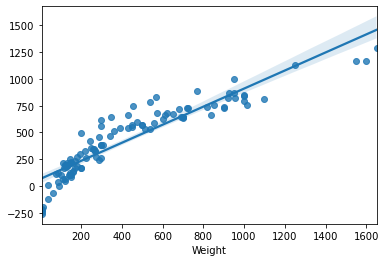

In [93]:
sns.regplot(ytrain,trainpredicted)

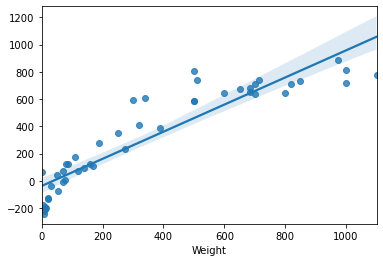

In [91]:
sns.regplot(ytest,testpredicted)